first understand the "story" of the data → then visualize relationships → then model.

### Understand the data context
What does each feature mean? (sepal length, petal width in Iris?)

What’s the prediction target (label)? (Iris species)

Any domain knowledge that helps (e.g. botanists use petal size to classify flowers)?

### Inspect the dataset size & shape
How many rows (samples) and cols (features)?

Balanced or imbalanced classes?

### Check data quality
Missing values, weird values, outlier

Feature types (numeric, categorical, text, images).

### Explore visually & statistically (EDA = Exploratory Data Analysis)
Summary statistics (mean, variance, correlations).

Plots to see separability between classes.

### Plot
Histogram / density plots of each feature (check distribution).

Boxplots (spot outliers, compare distributions across species).

Pairplot / scatterplot matrix (classic Iris visualization: scatter plots of petal/sepal features with colors by species).

Correlation heatmap (which features are redundant).

Maybe PCA (to see separability in 2D)

### Approach Flow
Load data → df.head(), df.info(), df.describe().

Plot distributions of features.

Plot class balance (bar chart of species counts).

Try pairwise scatterplots → look for separability.

Check correlations/redundancy.

Think about preprocessing (scaling, normalization).

Only then → try a simple baseline model (like logistic regression or simple NN).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("./Iris.csv")

In [9]:
# Quick look at data

print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
      

# Iris
A dataset contains measurements of **150 iris flower**, belonging to **3 species**:
- *Iris setosa*
- *Iris versicolor*
- *Iris virginica*

**Goal:** Given the flower's measurements, predict which species it belongs to.

**Samples:** 150 flowers $\to$ 50 samples per species.

## Features
1. **Sepal length:** the length of the outer part of the flower (sepal = "protective leaf").
2. **Sepal width:** the width of the sepal.
3. **Petal length:** the length of the inner colored part (petal).
4. **Petal width:** the width of the petal.

*sedal*: đài hoa, *petal*: cánh hoa

In [14]:
# Get numeric feature columns (exclude 'species')
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

numeric_cols

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

/tmp/ipykernel_15166/2041742377.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


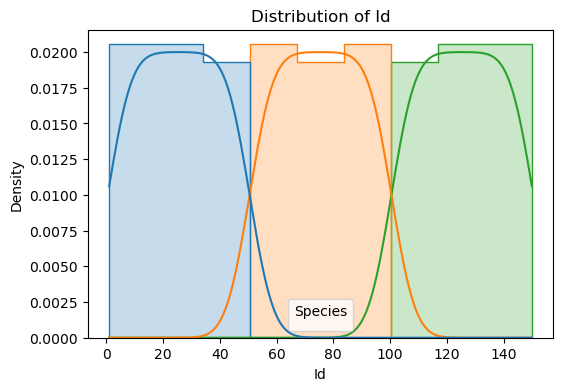

/tmp/ipykernel_15166/2041742377.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


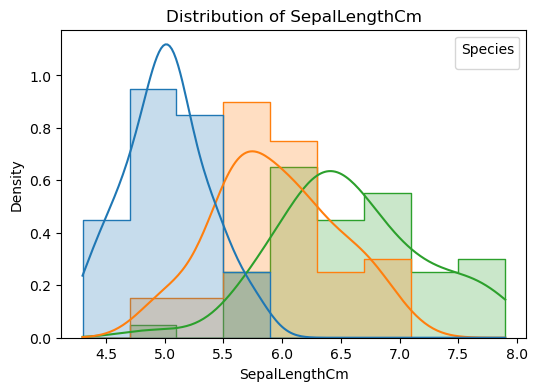

/tmp/ipykernel_15166/2041742377.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


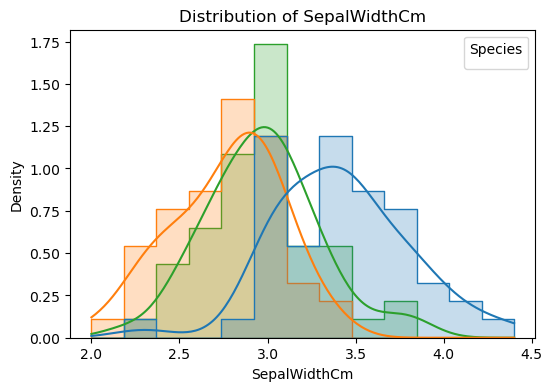

/tmp/ipykernel_15166/2041742377.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


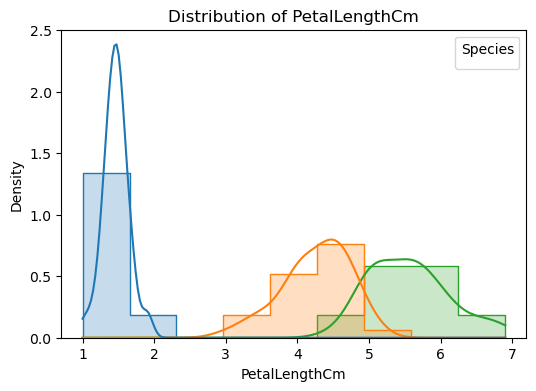

/tmp/ipykernel_15166/2041742377.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


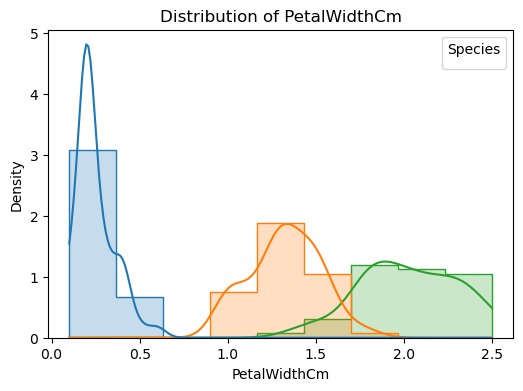

In [16]:
# Plot distributions
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Species", kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Species")
    plt.show()